In [89]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
from scipy.optimize import curve_fit
from scipy.stats import linregress
from sklearn.metrics import r2_score

# Data Construction

There was no dataset available so I had to create my own. I chose to start with an array that I manually update instead of a google spreadsheet/CSV that I'd manually updeate & import so that I could track add arrays (note how I track sources). 

I did publish my dataset at [bit.ly/lacovid19](http://bit.ly/lacovid19)

In [211]:

data = {"2020-03-04" : {"cases" : 7, "deaths" : 0, "ladph_new" : 6, "source" : "http://www.publichealth.lacounty.gov/phcommon/public/media/mediapubhpdetail.cfm?prid=2249" },
        "2020-03-05" : {"cases" : 11, "deaths" : 0, "ladph_new" : 4,  "source" : "http://publichealth.lacounty.gov/phcommon/public/media/mediapubhpdetail.cfm?prid=2250"},
        "2020-03-06" : {"cases" : 13, "deaths" : 0, "ladph_new" : 2, "source" : "http://www.publichealth.lacounty.gov/phcommon/public/media/mediapubhpdetail.cfm?prid=2253" },
        "2020-03-07" : {"cases" : 14, "deaths" : 0, "ladph_new" : 1,  "source" : "http://publichealth.lacounty.gov/phcommon/public/media/mediapubhpdetail.cfm?prid=2256" },
        "2020-03-08" : {"cases" : 14, "deaths" : 0, "ladph_new" : 0, },
        "2020-03-09" : {"cases" : 16, "deaths" : 0, "ladph_new" : 2,  "community_transmitted" : 1, "source" : "http://publichealth.lacounty.gov/phcommon/public/media/mediapubhpdetail.cfm?prid=2258"},
        "2020-03-10" : {"cases" : 20, "deaths" : 0, "ladph_new" : 1, "long_beach" : 3, "community_transmitted" : 1, "source" : ["http://publichealth.lacounty.gov/phcommon/public/media/mediapubhpdetail.cfm?prid=2260",
                                                                                               "https://www.dailynews.com/2020/03/10/confirmed-la-county-coronavirus-cases-now-total-20/"]}, # 
        "2020-03-11" : {"cases" : 27, "deaths" : 1, "ladph_new" : 6, "long_beach" : 4, "pasadena" : 0, "community_transmitted" : 2, "source" : ["http://publichealth.lacounty.gov/phcommon/public/media/mediapubhpdetail.cfm?prid=2261",
                                                                                                "https://www.dailynews.com/2020/03/11/4th-person-tests-positive-for-coronavirus-in-long-beach/",
                                                                                               "https://www.dailybreeze.com/2020/03/11/la-county-reports-first-death-related-to-coronavirus-6-new-cases/"
                                                                                              ]},
        "2020-03-12" : {"cases" : 32, "deaths" : 1, "ladph_new" : 3, "long_beach" : 4, "pasadena" : 1, "community_transmitted" : 4, "source" : ["http://ph.lacounty.gov/phcommon/public/media/mediapubhpdetail.cfm?prid=2264",
                                                                                                                             "https://www.dailynews.com/2020/03/12/la-county-health-officials-announce-3-new-coronavirus-cases-including-more-community-spread/",
                                                                                                                                            "https://www.pasadenastarnews.com/2020/03/11/pasadena-reports-its-first-confirmed-case-of-coronavirus/"]}, 
        "2020-03-13" : {"cases" : 40, "deaths" : 1, "ladph_new" : 8, "long_beach" : 4, "pasadena" : 1,"community_transmitted" : 6, "source" : ["http://publichealth.lacounty.gov/phcommon/public/media/mediapubhpdetail.cfm?prid=2262",
                                                                                                                            "https://www.dailynews.com/2020/03/13/total-coronavirus-cases-in-la-county-rise-to-40-after-health-officials-announce-8-new-ones/"]}, # 41 if including extra
        "2020-03-14" : {"cases" : 53, "deaths" : 1, "ladph_new" : 11,"long_beach" : 5, "pasadena" : 1,"community_transmitted" : 8, "source" : ["http://www.publichealth.lacounty.gov/phcommon/public/media/mediapubhpdetail.cfm?prid=2265",
                                                                                                                            "https://www.dailynews.com/2020/03/14/11-new-la-county-coronavirus-cases-officials-say-total-now-53/",
                                                                                                                            "https://www.latimes.com/california/story/2020-03-14/supermakets-mobbed-street-clear-as-coronavirus-spreads-across-california",
                                                                                                                             "https://www.foxla.com/news/5th-case-of-covid-19-confirmed-in-long-beach-first-known-case-of-community-transmission"]
                                                                                                                            }, # 54 if including the extra
        "2020-03-15" : {"cases" : 69, "deaths" : 1, "ladph_new" : 16, "long_beach" : 6, "pasadena" : 1, "community_transmitted" : 10, "source" : ["https://twitter.com/lapublichealth/status/1239273555340046336"]},
        "2020-03-16" : {"cases" : 94, "deaths" : 1, "ladph_new" : 25, "note": "LB discrepancy, reported total of 5 today.", "long_beach" : 5, "pasadena" : 2, "community_transmitted" : 15, "source" : ["http://www.publichealth.lacounty.gov/phcommon/public/media/mediapubhpdetail.cfm?prid=2268", "https://www.facebook.com/lapublichealth/videos/205067544141294"]},
        "2020-03-17" : {"cases" : 144, "deaths" : 1, "ladph_new" : 50, "long_beach" : 8,"community_transmitted": None, "note" : "more testing came online.", "pasadena" : 2, "source" : ["https://www.facebook.com/lapublichealth/videos/137870180981495/","https://www.cityofpasadena.net/public-health/news-announcements/information-on-covid-19/","https://laist.com/latest/post/20200317/long-beach-coronavirus-cases","https://www.dailynews.com/2020/03/17/50-new-coronavirus-cases-reported-in-los-angeles-county-as-leaders-announce-financial-relief-steps/?utm_source=twitter.com&utm_medium=social&utm_campaign=socialflow&utm_content=tw-ladailynews"]}
        
}

In [208]:
# convert to pandas dataframe
df = pd.DataFrame(data).T

# recognize index as dates
df.index = pd.to_datetime(df.index)

# use day count, for math functions
df["days"] = df.index - df.index[0]
df["days"] = (df.days / 86400000000000).astype(int)

# fill in the blanks with 0s for numerical columns. 
df[df.columns[~df.columns.isin(["source","note"])]] = df[df.columns[~df.columns.isin(["source","note"])]].fillna(0)

# move days column to the front. don't risk dropping columns
df = df[list(df.columns[-1:]) + list(df.columns[:-1])]

df

,days,cases,community_transmitted,deaths,ladph_new,long_beach,note,pasadena,source
2020-03-04,0,7.0,0,0.0,6.0,0,NaN,0,http://www.publichealth.lacounty.gov/phcommon/...
2020-03-05,1,11.0,0,0.0,4.0,0,NaN,0,http://publichealth.lacounty.gov/phcommon/publ...
2020-03-06,2,13.0,0,0.0,2.0,0,NaN,0,http://www.publichealth.lacounty.gov/phcommon/...
2020-03-07,3,14.0,0,0.0,1.0,0,NaN,0,http://publichealth.lacounty.gov/phcommon/publ...
2020-03-08,4,14.0,0,0.0,0.0,0,NaN,0,NaN
2020-03-09,5,16.0,1,0.0,2.0,0,NaN,0,http://publichealth.lacounty.gov/phcommon/publ...
2020-03-10,6,20.0,1,0.0,1.0,3,NaN,0,[http://publichealth.lacounty.gov/phcommon/pub...
2020-03-11,7,27.0,2,1.0,6.0,4,NaN,0,[http://publichealth.lacounty.gov/phcommon/pub...
2020-03-12,8,32.0,4,1.0,3.0,4,NaN,1,[http://ph.lacounty.gov/phcommon/public/media/...
2020-03-13,9,40.0,6,1.0,8.0,4,NaN,1,[http://publichealth.lacounty.gov/phcommon/pub...


# Analysis

So technically with an exponential fit, you'd use a linear regression to estimate the coefficients. However, with an accelerating growth rate in LA, it wasn't performing very well at estimating the most recent data points, which were probably the most reliable.

So I also included a straight curve fit, which will bias towards more recent data points (as the error for getting those wrong is heavier). Does more poorly on earlier data points, but also is more consistent with national averages at time of writing (about ~33% daily growth)

R^2 0.9803542669735551
LinregressResult(slope=0.20852714006452752, intercept=1.9390842436700633, rvalue=0.9816275744748606, pvalue=5.337416077302443e-10, stderr=0.01170090573742745) 1.2318623624312668


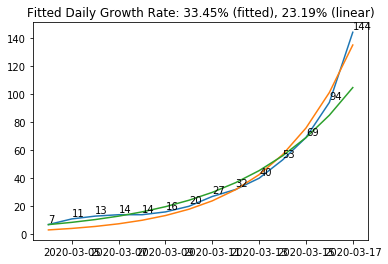

In [214]:
# plot cases
plt.plot(df.index, df.cases)

# fit #1: curve fit. Seeded with 33% national average and 7=first day of cases. 
cf = curve_fit(lambda t,a,b: a*np.exp(b*t),  df.days,  df.cases,  p0=(7, np.log(1.33)))

# plot fit #1
plt.plot(df.index, cf[0][0] * np.exp(cf[0][1]*df.days))

# store it for exporting. if the variable is number of days, then e^b is our daily multiplier. 
# subtract 1 to get growth rate, multiply by 100 for a formatted %. 
df["cases_pred_{}pct_curvefit".format(int((np.exp(cf[0][1]) - 1)*100))] = cf[0][0] * np.exp(cf[0][1]*df.days)

# calculate R^2 for the curve fit
print "R^2", r2_score(df.cases, cf[0][0] * np.exp(cf[0][1]*df.days))

# fit #2: linear regression. take the ln() of case count. 
# For exponential growth, we have cases = (day 1 cases) * (daily growth rate)^(days)
# It becomes linear with ln(cases) = ln(day 1 cases) + (days) * ln(daily growth rate)
# This linear in (days), with slope = ln(daily growth rate) and intercept = ln(day 1 cases)
lr = linregress(df.days, y=df.cases.map(np.log))

# print results + growth rate
print lr, np.exp(lr.slope)

# plot fit #2
plt.plot(df.index, np.exp(lr.intercept) * np.exp(lr.slope*df.days))

# store it for exporting. 
# if slope = ln(daily growth rate) , then daily growth rate = e^slope. Subtract 1. 
df["cases_pred_{}pct_linreg".format(int((np.exp(lr.slope)-1)*100))] =  np.exp(lr.intercept) * np.exp(lr.slope*df.days)

# Show both growth rates in the title. 
plt.title("Fitted Daily Growth Rate: {:0.2f}% (fitted), {:0.2f}% (linear)".format((np.exp(cf[0][1]) - 1)*100,(np.exp(lr.slope)-1)*100))
for i,r in df.iterrows():
    plt.text(i, r.cases+2, int(r.cases))
    


In [210]:
df.to_csv("lacv.csv")